In [1]:
#-*- coding:utf-8 -*-
# 画谱系聚类图

import pandas as pd

# 参数初始化
filename = '1_1standardization.xlsx'
data = pd.read_excel(filename, index_col = u'基站编号')

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
# 这里使用scipy的层次聚类函数

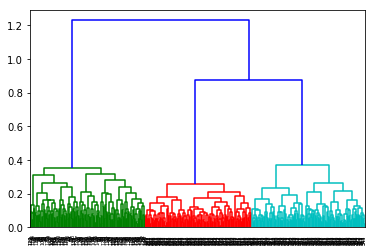

In [2]:
z = linkage(data, method = 'weighted', metric = 'euclidean') # method = 'weighted'时的谱系聚类图

p = dendrogram(z, 0) # 画谱系聚类图
plt.show()

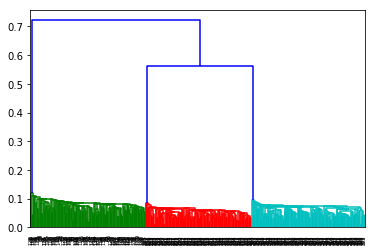

In [3]:
z = linkage(data, method = 'single', metric = 'euclidean') # method = 'single'谱系聚类图 

p = dendrogram(z, 0) # 画谱系聚类图
plt.show()

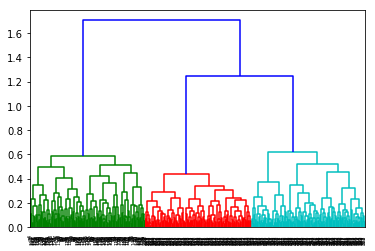

In [4]:
z = linkage(data, method = 'complete', metric = 'euclidean') # method = 'complete'谱系聚类图 

p = dendrogram(z, 0) # 画谱系聚类图
plt.show()

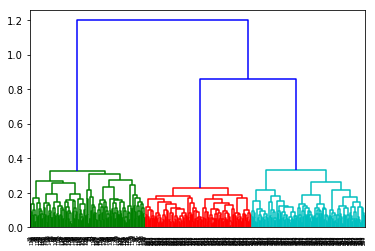

In [5]:
z = linkage(data, method = 'average', metric = 'euclidean') # method = 'average'谱系聚类图 

p = dendrogram(z, 0) # 画谱系聚类图
plt.show()

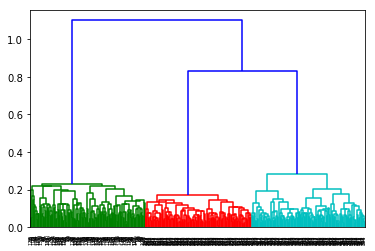

In [6]:
z = linkage(data, method = 'centroid', metric = 'euclidean') # method = 'centroid'谱系聚类图 

p = dendrogram(z, 0) # 画谱系聚类图
plt.show()

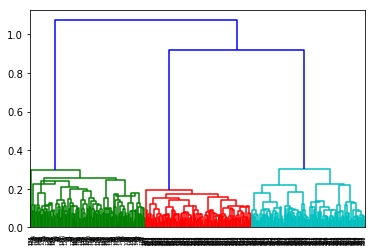

In [7]:
z = linkage(data, method = 'median', metric = 'euclidean') # method = 'median'谱系聚类图 

p = dendrogram(z, 0) # 画谱系聚类图
plt.show()

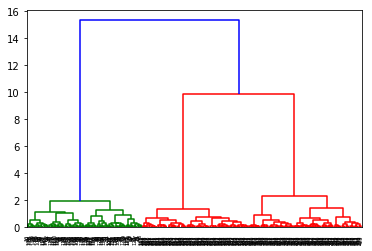

In [8]:
z = linkage(data, method = 'ward', metric = 'euclidean') # method = 'ward'谱系聚类图 # Ward方差最小化算法

p = dendrogram(z, 0) # 画谱系聚类图
plt.savefig('puxijulei.jpg')
plt.show()

In [9]:
# 由谱系聚类图可知，聚类类别为3类
# 层次聚类算法

import pandas as pd

# 参数初始化
filename = '1_1standardization.xlsx'
data = pd.read_excel(filename, index_col = u'基站编号')
k = 3 # 聚类数

from sklearn.cluster import AgglomerativeClustering # 导入sklearn的层次聚类函数
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
model.fit(data) # 训练模型


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x000000000627D908>)

In [10]:
# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1) # 详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] # 重命名表名

import matplotlib.pyplot as plt
plt.rc('figure',figsize=(7,6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

style = ['ro-', 'go-', 'bo-']
xlabels = [u'工作日人均停留时间', u'凌晨人均停留时间', u'周末人均停留时间', u'日均人流量']
pic_output = 'type_'

for i in range(k): # 逐一作图，作出不同样式
    plt.figure()
    tmp = r[r[u'聚类类别'] == i].iloc[:,:4] # 提取每一类
    for j in range(len(tmp)):
        plt.plot(range(1,5), tmp.iloc[j], style[i])
    
    plt.xticks(range(1,5), xlabels, rotation = 20) # 坐标标签 (***)
    plt.subplots_adjust(bottom=0.15) # 调整底部 (***)
    plt.savefig(u'%s%s.png' % (pic_output, i)) # 保存图片

    